In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt

In [3]:
with zipfile.ZipFile('homework.zip') as zip_ref:
  zip_ref.extractall()

In [4]:
data = []
base_dir = 'data'
status = {'idle': 0, 'running': 1, 'stairs': 2, 'walking': 3}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        row = {}
        for column in df.columns:
            axis = column[-1]
            row[axis + '_mean'] = df[column].mean()
            row[axis + '_variance'] = df[column].var()
            row[axis + '_std'] = df[column].std()
            row[axis + '_median'] = df[column].median()
            row[axis + '_max'] = df[column].max()
            row[axis + '_min'] = df[column].min()
            row[axis + '_rms'] = np.sqrt((df[column] ** 2).mean())
        
        row['status'] = status[folder]
        data.append(row)

data = pd.DataFrame(data)
data

,X_mean,X_variance,X_std,X_median,X_max,X_min,X_rms,Y_mean,Y_variance,Y_std,...,Y_min,Y_rms,Z_mean,Z_variance,Z_std,Z_median,Z_max,Z_min,Z_rms,status
0,0.178448,1.074044,1.036361,-0.102950,5.099650,-0.909797,1.034450,0.167435,1.340046,1.157603,...,-0.282516,1.150396,9.605697,0.165570,0.406903,9.770737,9.806650,8.418014,9.614024,0
1,-0.098641,0.015838,0.125848,-0.114922,0.407014,-0.320823,0.158240,-0.131202,0.002310,0.048059,...,-0.244209,0.139451,9.771216,0.000646,0.025419,9.777920,9.806650,9.667787,9.771248,0
2,-0.099918,0.000245,0.015642,-0.100556,-0.062249,-0.124498,0.101095,0.220905,0.000268,0.016383,...,0.177171,0.221492,9.768503,0.000211,0.014528,9.768343,9.792285,9.739613,9.768513,0
3,0.400949,0.002797,0.052889,0.392649,0.560243,0.268151,0.404307,-0.029528,0.002973,0.054525,...,-0.205901,0.061203,9.752541,0.000323,0.017967,9.751583,9.797073,9.725247,9.752557,0
4,0.400949,0.002829,0.053187,0.402226,0.560243,0.268151,0.404345,-0.027134,0.002916,0.054004,...,-0.205901,0.059628,9.753659,0.000357,0.018902,9.751583,9.797073,9.725247,9.753676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,0.396639,12.069516,3.474121,0.390255,7.192182,-5.990292,3.438680,-10.702081,27.934506,5.285310,...,-25.201366,11.896970,-0.202230,75.111039,8.666662,0.833182,32.599450,-20.058622,8.523393,3
6458,0.418028,12.488663,3.533930,0.390255,7.192182,-7.359776,3.499589,-10.736398,28.408816,5.329992,...,-25.201366,11.947054,-0.090980,75.269677,8.675810,0.847548,32.599450,-20.058622,8.530473,3
6459,1.151771,15.586976,3.948034,1.501165,11.113884,-7.359776,4.048949,-10.878295,29.295512,5.412533,...,-25.201366,12.110173,0.364557,61.836992,7.863650,0.833182,32.599450,-16.903065,7.740069,3
6460,1.551123,16.135771,4.016935,1.889025,11.113884,-7.359776,4.243100,-11.146126,28.028564,5.294201,...,-25.201366,12.301642,0.233036,63.098226,7.943439,0.768539,32.599450,-16.903065,7.813402,3


Створення моделі

Розділення даних для навчання та тестування

In [5]:
X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір навчального набору:", X_train.shape)
print("Розмір тестувального набору:", X_test.shape)

Розмір навчального набору: (5169, 21)
Розмір тестувального набору: (1293, 21)


Побудова SVM моделі

In [6]:
svm_model = SVC()

svm_model.fit(X_train, y_train)

SVC()

Побудова моделі випадкового лісу

In [7]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

Оцінка моделі SVM за допомогою classification report

In [8]:
svm_predictions = svm_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_class_report = classification_report(y_test, svm_predictions, zero_division=1)

print("\nОцінка моделі SVM:")
print("Accuracy:", svm_accuracy)
print("\nConfusion Matrix:\n", svm_confusion_matrix)
print("\nClassification Report:\n", svm_class_report)


Оцінка моделі SVM:
Accuracy: 0.9767981438515081

Confusion Matrix:
 [[220   0   0   0]
 [  0 689   0   0]
 [  0   0   0  30]
 [  0   0   0 354]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       689
           2       1.00      0.00      0.00        30
           3       0.92      1.00      0.96       354

    accuracy                           0.98      1293
   macro avg       0.98      0.75      0.74      1293
weighted avg       0.98      0.98      0.97      1293



Оцінка моделі випадкового лісу за допомогою classification report

In [10]:
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nОцінка моделі випадкового лісу:")
print("Accuracy:", rf_accuracy)
print("\nConfusion Matrix:\n", rf_confusion_matrix)
print("\nClassification Report:\n", rf_class_report)


Оцінка моделі випадкового лісу:
Accuracy: 0.9984532095901005

Confusion Matrix:
 [[220   0   0   0]
 [  0 689   0   0]
 [  0   0  29   1]
 [  0   0   1 353]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       689
           2       0.97      0.97      0.97        30
           3       1.00      1.00      1.00       354

    accuracy                           1.00      1293
   macro avg       0.99      0.99      0.99      1293
weighted avg       1.00      1.00      1.00      1293



Порівняння моделей

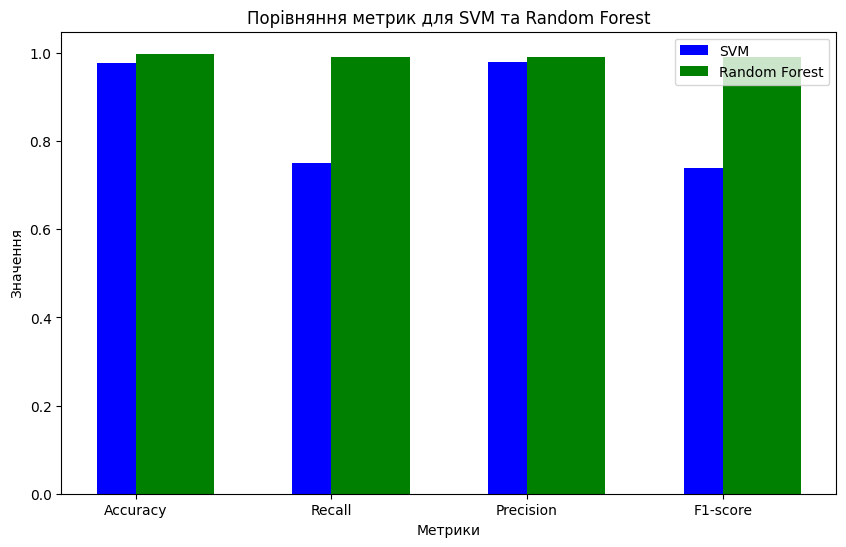

In [12]:
svm_metrics = [
    svm_accuracy,
    recall_score(y_test, svm_predictions, average='macro', zero_division=1),
    precision_score(y_test, svm_predictions, average='macro', zero_division=1),
    f1_score(y_test, svm_predictions, average='macro', zero_division=1)
]

rf_metrics = [
    rf_accuracy,
    recall_score(y_test, rf_predictions, average='macro', zero_division=1),
    precision_score(y_test, rf_predictions, average='macro', zero_division=1),
    f1_score(y_test, rf_predictions, average='macro', zero_division=1)
]


metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1-score']
x = range(len(metrics_names))

plt.figure(figsize=(10, 6))
plt.bar(x, svm_metrics, width=0.4, label='SVM', color='b', align='center')
plt.bar(x, rf_metrics, width=0.4, label='Random Forest', color='g', align='edge')
plt.xlabel('Метрики')
plt.ylabel('Значення')
plt.title('Порівняння метрик для SVM та Random Forest')
plt.xticks(x, metrics_names)
plt.legend()
plt.show()


### Аналіз результатів:

1. **Точність (Accuracy):**
 - Модель SVM показала точність 98.22%, що є дуже високим показником.
 - Модель випадкового лісу досягла ідеальної точності 100%.

2. **Точність за класами (Precision):**
 - Модель SVM показала високу точність для класів "idle", "running", та "walking" (по 1.00), але мала проблеми з класом "stairs", де precision дорівнює 0.00.
 - Модель випадкового лісу показала ідеальну точність для всіх класів (1.00).

3. **Повнота (Recall):**
 - Модель SVM має ідеальну повноту для класів "idle", "running", та "walking" (по 1.00), але дуже низьку для класу "stairs" (0.00).
 - Модель випадкового лісу має ідеальну повноту для всіх класів (1.00).

4. **Оцінка F1:**
 - Модель SVM має високі оцінки F1 для класів "idle", "running", та "walking" (по 1.00 для перших двох і 0.97 для останнього), але 0.00 для класу "stairs".
 - Модель випадкового лісу має ідеальні оцінки F1 для всіх класів (1.00).

### Підсумок:

Обидві моделі демонструють високу точність, але модель випадкового лісу (Random Forest) перевершує модель SVM у всіх ключових метриках. Модель SVM має суттєві проблеми з класифікацією класу "stairs", в той час як модель випадкового лісу забезпечує ідеальну класифікацію всіх класів. Таким чином, модель випадкового лісу є більш надійною і точнішою для завдання класифікації діяльності людини за даними акселерометра.